In [14]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [15]:
df = pd.read_csv(r'D:\Supervised Machine Learning lab (SMLL)\2\Assignment 2 Advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [16]:
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [17]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [18]:
X = df.drop(['Sales'], axis=1)
y = df['Sales']

In [19]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
para = {
    'n_neighbors': np.arange(1, 21),
    'weights': ['uniform', 'distance', ],
    'metric': ['euclidean', 'manhattan', 'minkowski', 'chebyshev']
}

In [22]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()
model = GridSearchCV(knn, para, cv=20)
model.fit(X_train, y_train)


GridSearchCV(cv=20, estimator=KNeighborsRegressor(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski',
                                    'chebyshev'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20]),
                         'weights': ['uniform', 'distance']})

In [23]:
print('Parameters:', model.best_params_)
print('Cross-Validation Score:', model.best_score_)
print('Parameters:', model.best_params_)
print('Cross-Validation Score:', model.best_score_)
print('Test Set Score:', model.score(X_test, y_test))
print('R2 Score:', r2_score(y_test, model.predict(X_test)))

Parameters: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
Cross-Validation Score: 0.903715546132126
Parameters: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
Cross-Validation Score: 0.903715546132126
Test Set Score: 0.9154308401537737
R2 Score: 0.9154308401537737


In [24]:
best_knn = KNeighborsRegressor(n_neighbors=5, metric='manhattan', weights='distance')
best_knn.fit(X_train, y_train)
y_pred = best_knn.predict(X_test)


In [25]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Best model RMSE : ", rmse)
print("Best score :", best_knn.score(X_test, y_test))
print("Parameters of best model : ", best_knn.get_params())
print("Cross validation score : ", cross_val_score(best_knn, X, y, cv=10).mean())
print("R2 Score", r2_score(y_test, y_pred))

Best model RMSE :  1.6550067206155745
Best score : 0.9132213122822012
Parameters of best model :  {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'manhattan', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'distance'}
Cross validation score :  0.9246583004397033
R2 Score 0.9132213122822012


C:\Users\Neil\AppData\Local\Temp\ipykernel_29220\1249477697.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


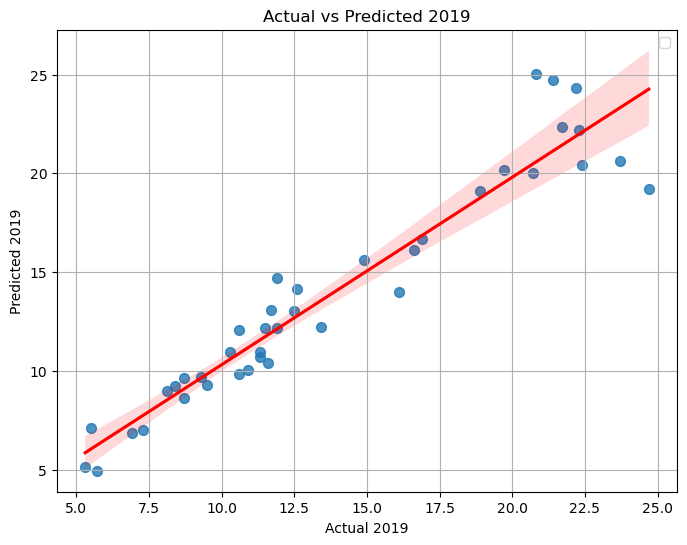

In [26]:

plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws = {'s':50}, line_kws = {'color':'red'})
plt.xlabel('Actual 2019')
plt.ylabel('Predicted 2019')
plt.title('Actual vs Predicted 2019')
plt.legend()
plt.grid(True)
plt.show()
